In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_credit=pd.read_csv('credit_record.csv')

In [3]:
data_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
data_credit.duplicated().sum()

0

In [5]:
data_credit_ids=pd.read_csv('credit_record.csv')
data_credit_ids.drop(['MONTHS_BALANCE','STATUS'],axis=1,inplace=True)
data_credit_ids.drop_duplicates(inplace=True)
data_credit_ids

,ID
0,5001711
4,5001712
23,5001713
45,5001714
60,5001715
...,...
1048494,5150482
1048512,5150483
1048530,5150484
1048543,5150485


In [6]:
data_credit_ids.reset_index(inplace=True,drop=True)
data_credit_ids

,ID
0,5001711
1,5001712
2,5001713
3,5001714
4,5001715
...,...
45980,5150482
45981,5150483
45982,5150484
45983,5150485


In [7]:
len(data_credit_ids)

45985

In [8]:
data_credit['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60], dtype=int64)

In [9]:
len(data_credit)     # 45985 unique

1048575

In [10]:
count=1
X_C=0
one_month=0
more_than_month=0
ids=0 
j=0
for i in range(len(data_credit)-1):
    j=i
    x=data_credit.loc[j,'ID']
    j+=1
    if data_credit.loc[j,'ID']==x:              #if id is repeated
        count+=1
        if data_credit.loc[i,'STATUS']=='X' or data_credit.loc[i,'STATUS']=='C':
            X_C+=1
        elif data_credit.loc[i,'STATUS']=='0':
            one_month+=1
        elif data_credit.loc[i,'STATUS']=='1' or data_credit.loc[i,'STATUS']=='2' or data_credit.loc[i,'STATUS']=='3' or data_credit.loc[i,'STATUS']=='4' or data_credit.loc[i,'STATUS']=='5':
            more_than_month+=1

    else :
        if data_credit.loc[i,'STATUS']=='X' or data_credit.loc[i,'STATUS']=='C':
            X_C+=1
        elif data_credit.loc[i,'STATUS']=='0':
            one_month+=1
        elif data_credit.loc[i,'STATUS']=='1' or data_credit.loc[i,'STATUS']=='2' or data_credit.loc[i,'STATUS']=='3' or data_credit.loc[i,'STATUS']=='4' or data_credit.loc[i,'STATUS']=='5':
            more_than_month+=1

        data_credit_ids.loc[ids,'Months']=count
        data_credit_ids.loc[ids,'X or C counts']=X_C
        data_credit_ids.loc[ids,'one month delay']=one_month
        data_credit_ids.loc[ids,'more than one month']=more_than_month
        one_month=0
        more_than_month=0
        count=1
        X_C=0
        ids+=1



In [11]:
len(data_credit_ids)

45985

In [12]:
data_credit_ids.duplicated().sum()

0

In [13]:
count=0
X_C=0
one_month=0
more_than_month=0
for i in range(len(data_credit)):
    if data_credit.loc[i,'ID']==5150487:
        count+=1
        if data_credit.loc[i,'STATUS']=='X' or data_credit.loc[i,'STATUS']=='C':
            X_C+=1
        elif data_credit.loc[i,'STATUS']=='0':
            one_month+=1
        elif data_credit.loc[i,'STATUS']=='1' or data_credit.loc[i,'STATUS']=='2' or data_credit.loc[i,'STATUS']=='3' or data_credit.loc[i,'STATUS']=='4' or data_credit.loc[i,'STATUS']=='5':
            more_than_month+=1

In [14]:
for i in range(len(data_credit_ids)):
    if data_credit_ids.loc[i,'ID']==5150487:
        data_credit_ids.loc[i,'Months']=count
        data_credit_ids.loc[i,'X or C counts']=X_C
        data_credit_ids.loc[i,'one month delay']=one_month
        data_credit_ids.loc[i,'more than one month']=more_than_month
       

In [15]:
data_credit_ids

,ID,Months,X or C counts,one month delay,more than one month
0,5001711,4.0,1.0,3.0,0.0
1,5001712,19.0,9.0,10.0,0.0
2,5001713,22.0,22.0,0.0,0.0
3,5001714,15.0,15.0,0.0,0.0
4,5001715,60.0,60.0,0.0,0.0
...,...,...,...,...,...
45980,5150482,18.0,6.0,12.0,0.0
45981,5150483,18.0,18.0,0.0,0.0
45982,5150484,13.0,1.0,12.0,0.0
45983,5150485,2.0,0.0,2.0,0.0


In [16]:
for i in range(len(data_credit_ids)): 
    x=data_credit_ids.loc[i,'X or C counts']/data_credit_ids.loc[i,'Months']
    data_credit_ids.loc[i,'No_delay_%']=x

In [17]:
for i in range(len(data_credit_ids)): 
    x=data_credit_ids.loc[i,'one month delay']/data_credit_ids.loc[i,'Months']
    data_credit_ids.loc[i,'one_month_delay_%']=x

In [18]:
for i in range(len(data_credit_ids)): 
    x=data_credit_ids.loc[i,'more than one month']/data_credit_ids.loc[i,'Months']
    data_credit_ids.loc[i,'more_than_one_month_%']=x

In [19]:
len(data_credit_ids)

45985

In [20]:
data_credit_ids

,ID,Months,X or C counts,one month delay,more than one month,No_delay_%,one_month_delay_%,more_than_one_month_%
0,5001711,4.0,1.0,3.0,0.0,0.250000,0.750000,0.0
1,5001712,19.0,9.0,10.0,0.0,0.473684,0.526316,0.0
2,5001713,22.0,22.0,0.0,0.0,1.000000,0.000000,0.0
3,5001714,15.0,15.0,0.0,0.0,1.000000,0.000000,0.0
4,5001715,60.0,60.0,0.0,0.0,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
45980,5150482,18.0,6.0,12.0,0.0,0.333333,0.666667,0.0
45981,5150483,18.0,18.0,0.0,0.0,1.000000,0.000000,0.0
45982,5150484,13.0,1.0,12.0,0.0,0.076923,0.923077,0.0
45983,5150485,2.0,0.0,2.0,0.0,0.000000,1.000000,0.0


In [21]:
for i in range(len(data_credit_ids)):
    if data_credit_ids.loc[i,'No_delay_%'] + data_credit_ids.loc[i,'one_month_delay_%'] >= 0.75:
        data_credit_ids.loc[i,'Target']=1
    else:
        data_credit_ids.loc[i,'Target']=0

In [22]:
data_credit_ids

,ID,Months,X or C counts,one month delay,more than one month,No_delay_%,one_month_delay_%,more_than_one_month_%,Target
0,5001711,4.0,1.0,3.0,0.0,0.250000,0.750000,0.0,1.0
1,5001712,19.0,9.0,10.0,0.0,0.473684,0.526316,0.0,1.0
2,5001713,22.0,22.0,0.0,0.0,1.000000,0.000000,0.0,1.0
3,5001714,15.0,15.0,0.0,0.0,1.000000,0.000000,0.0,1.0
4,5001715,60.0,60.0,0.0,0.0,1.000000,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...
45980,5150482,18.0,6.0,12.0,0.0,0.333333,0.666667,0.0,1.0
45981,5150483,18.0,18.0,0.0,0.0,1.000000,0.000000,0.0,1.0
45982,5150484,13.0,1.0,12.0,0.0,0.076923,0.923077,0.0,1.0
45983,5150485,2.0,0.0,2.0,0.0,0.000000,1.000000,0.0,1.0


In [23]:
data_credit_ids['Target'].value_counts()

1.0    45384
0.0      601
Name: Target, dtype: int64

In [24]:
data_credit_ids.drop(['No_delay_%','one_month_delay_%','more_than_one_month_%'],axis=1,inplace=True)

In [25]:
data_credit_ids

,ID,Months,X or C counts,one month delay,more than one month,Target
0,5001711,4.0,1.0,3.0,0.0,1.0
1,5001712,19.0,9.0,10.0,0.0,1.0
2,5001713,22.0,22.0,0.0,0.0,1.0
3,5001714,15.0,15.0,0.0,0.0,1.0
4,5001715,60.0,60.0,0.0,0.0,1.0
...,...,...,...,...,...,...
45980,5150482,18.0,6.0,12.0,0.0,1.0
45981,5150483,18.0,18.0,0.0,0.0,1.0
45982,5150484,13.0,1.0,12.0,0.0,1.0
45983,5150485,2.0,0.0,2.0,0.0,1.0


In [26]:
data_app=pd.read_csv('application_record.csv')
data_app.duplicated().sum()

0

In [27]:
data_app['ID'].duplicated().sum()

47

In [28]:
data_app['ID'].drop_duplicates(inplace=True)

In [29]:
ids=list(data_credit_ids['ID'])

In [30]:
id_col=data_app['ID']
len(id_col)

438557

In [31]:
data_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [32]:
data=pd.merge(data_app,data_credit_ids, on='ID')

In [33]:
len(data)

36457

In [34]:
data.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Months,X or C counts,one month delay,more than one month,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,16.0,14.0,1.0,1.0,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,15.0,13.0,1.0,1.0,1.0


In [35]:
data.duplicated().sum()

0

In [36]:
for i in range(len(data)):
    if data.loc[i,'CODE_GENDER']=='F':
        data.loc[i,'CODE_GENDER']=data.loc[i,'CODE_GENDER'].replace('F','0')
    elif data.loc[i,'CODE_GENDER']=='M':
        data.loc[i,'CODE_GENDER']=data.loc[i,'CODE_GENDER'].replace('M','1')

data['CODE_GENDER']=data['CODE_GENDER'].astype('int')

In [37]:
for i in range(len(data)):
    if data.loc[i,'FLAG_OWN_CAR']=='N':
        data.loc[i,'FLAG_OWN_CAR']=0
    elif data.loc[i,'FLAG_OWN_CAR']=='Y':
        data.loc[i,'FLAG_OWN_CAR']=1
data['FLAG_OWN_CAR']=data['FLAG_OWN_CAR'].astype('int')

In [38]:
for i in range(len(data)):
    if data.loc[i,'FLAG_OWN_REALTY']=='Y':
        data.loc[i,'FLAG_OWN_REALTY']=0
    elif data.loc[i,'FLAG_OWN_REALTY']=='N':
        data.loc[i,'FLAG_OWN_REALTY']=1
data['FLAG_OWN_REALTY']=data['FLAG_OWN_REALTY'].astype('int')

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['AMT_INCOME_TOTAL']=le.fit_transform(data['AMT_INCOME_TOTAL'])

In [40]:
data.head(1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Months,X or C counts,one month delay,more than one month,Target
0,5008804,1,1,0,0,226,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,16.0,14.0,1.0,1.0,1.0


In [42]:
data.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
Months                     0
X or C counts              0
one month delay            0
more than one month        0
Target                     0
dtype: int64

In [43]:
data.drop(['OCCUPATION_TYPE'],axis=1,inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int32  
 2   FLAG_OWN_CAR         36457 non-null  int32  
 3   FLAG_OWN_REALTY      36457 non-null  int32  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  int64  
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [45]:
data.columns 

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'Months', 'X or C counts',
       'one month delay', 'more than one month', 'Target'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns :
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

In [47]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Months,X or C counts,one month delay,more than one month,Target
0,5008804,1,1,0,0,226,4,1,0,4,...,1,1,0,0,2.0,16.0,14.0,1.0,1.0,1.0
1,5008805,1,1,0,0,226,4,1,0,4,...,1,1,0,0,2.0,15.0,13.0,1.0,1.0,1.0
2,5008806,1,1,0,0,77,4,4,1,1,...,1,0,0,0,2.0,30.0,23.0,7.0,0.0,1.0
3,5008808,0,0,0,0,192,0,4,3,1,...,1,0,1,1,1.0,5.0,3.0,2.0,0.0,1.0
4,5008809,0,0,0,0,192,0,4,3,1,...,1,0,1,1,1.0,5.0,5.0,0.0,0.0,1.0


In [48]:
cols=['CNT_FAM_MEMBERS','Months','X or C counts','one month delay','more than one month','Target']
for col in cols :
    data[col]=data[col].astype('int')

In [49]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Months,X or C counts,one month delay,more than one month,Target
0,5008804,1,1,0,0,226,4,1,0,4,...,1,1,0,0,2,16,14,1,1,1
1,5008805,1,1,0,0,226,4,1,0,4,...,1,1,0,0,2,15,13,1,1,1
2,5008806,1,1,0,0,77,4,4,1,1,...,1,0,0,0,2,30,23,7,0,1
3,5008808,0,0,0,0,192,0,4,3,1,...,1,0,1,1,1,5,3,2,0,1
4,5008809,0,0,0,0,192,0,4,3,1,...,1,0,1,1,1,5,5,0,0,1


In [50]:
len(data)

36457

<AxesSubplot:>

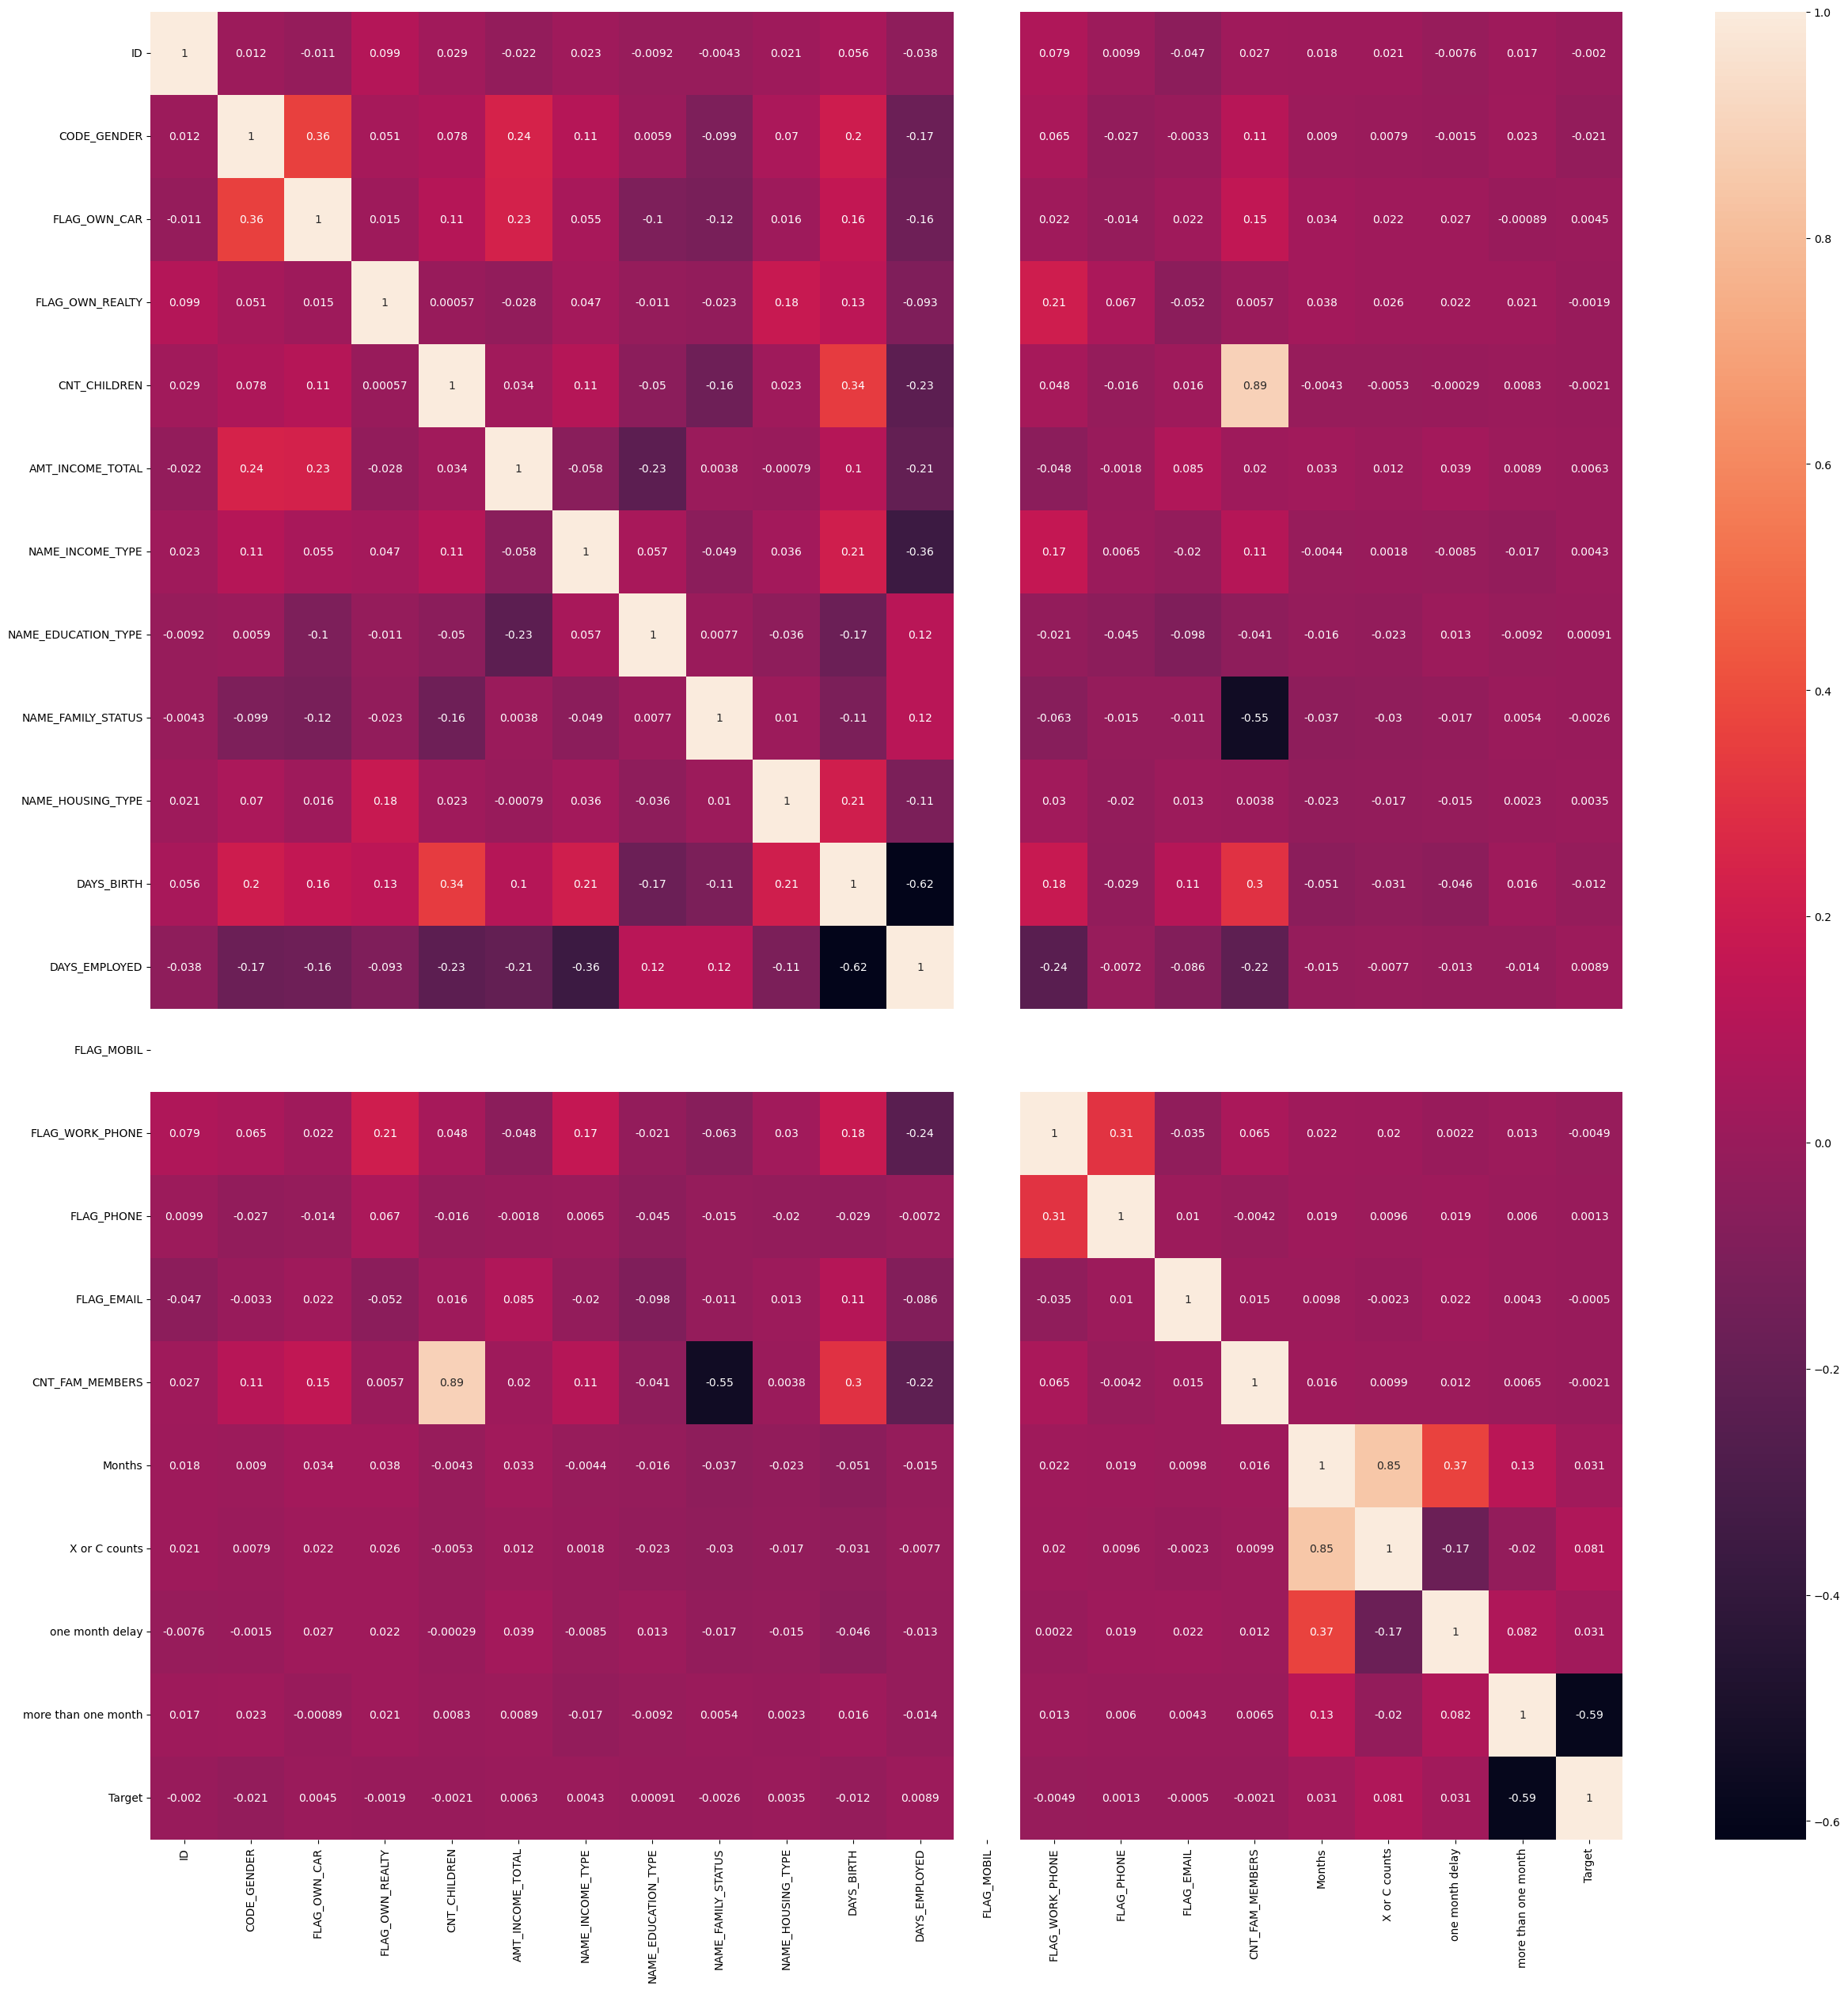

In [51]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

In [52]:
data.drop(['ID','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMAIL','FLAG_WORK_PHONE','FLAG_PHONE'],axis=1,inplace=True)

In [53]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,Months,X or C counts,one month delay,more than one month,Target
0,1,1,0,0,226,4,1,0,-12005,-4542,2,16,14,1,1,1
1,1,1,0,0,226,4,1,0,-12005,-4542,2,15,13,1,1,1
2,1,1,0,0,77,4,4,1,-21474,-1134,2,30,23,7,0,1
3,0,0,0,0,192,0,4,3,-19110,-3051,1,5,3,2,0,1
4,0,0,0,0,192,0,4,3,-19110,-3051,1,5,5,0,0,1


In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
SD=StandardScaler()
x_train=SD.fit_transform(x_train)
x_test=SD.transform(x_test)

In [ ]:
data['Target'].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Data before oversampling',Counter(y_train))

In [ ]:
sm=SMOTE()
x_res,y_res=sm.fit_resample(x_train,y_train)
print('Data after oversampling',Counter(y_res))

In [ ]:
from sklearn.metrics import recall_score , precision_score , accuracy_score, f1_score 

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_res,y_res)
        
y_pred=model.predict(x_test)
print('accuraccy of test data :',accuracy_score(y_test,y_pred)) 

print('Recall: ',recall_score(y_test,y_pred) )
print('Precision: ',precision_score(y_test,y_pred) )
print('F1_score: ',f1_score(y_test,y_pred) )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_features=5)
model.fit(x_res,y_res)
y_pred=model.predict(x_test)

print('accuraccy of test data :',accuracy_score(y_test,y_pred)) 

print('Recall: ',recall_score(y_test,y_pred) )
print('Precision: ',precision_score(y_test,y_pred) )
print('F1_score: ',f1_score(y_test,y_pred) )

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_res,y_res)

y_pred=model.predict(x_test)
print('accuraccy of test data :',accuracy_score(y_test,y_pred)) 

print('Recall: ',recall_score(y_test,y_pred) )
print('Precision: ',precision_score(y_test,y_pred) )
print('F1_score: ',f1_score(y_test,y_pred) )